## 1. Install Required Libraries
First, let's install all the necessary packages for our analysis.

In [1]:
# Install required packages
!pip install pandas numpy matplotlib seaborn plotly wordcloud textblob nltk scikit-learn -q

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

print("✅ All packages installed successfully!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


✅ All packages installed successfully!


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## 2. Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# NLP
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import string

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 3. Load and Explore the Data

We'll load the student feedback CSV file and explore its structure.

In [3]:
# For Google Colab - Upload the CSV file
from google.colab import files

print("📁 Please upload your 'student_feedback.csv' file:")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
print(f"\n✅ File '{filename}' uploaded successfully!")

📁 Please upload your 'student_feedback.csv' file:


Saving student_feedback.csv to student_feedback.csv

✅ File 'student_feedback.csv' uploaded successfully!


In [4]:
# Load the data
df = pd.read_csv(filename)

# Display basic info
print("="*60)
print("📊 DATASET OVERVIEW")
print("="*60)
print(f"\n📌 Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📌 Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print("\n📌 First 5 rows:")
df.head()

📊 DATASET OVERVIEW

📌 Shape: 1001 rows × 10 columns

📌 Columns:
   1. Unnamed: 0
   2. Student ID
   3. Well versed with the subject
   4. Explains concepts in an understandable way
   5. Use of presentations
   6. Degree of difficulty of assignments
   7. Solves doubts willingly
   8. Structuring of the course
   9. Provides support for students going above and beyond
   10. Course recommendation based on relevance

📌 First 5 rows:


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [5]:
# Check data types and missing values
print("\n📌 Data Types & Missing Values:")
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df)

print("\n📌 Statistical Summary:")
df.describe()


📌 Data Types & Missing Values:
                                                   Data Type  Non-Null Count  \
Unnamed: 0                                             int64            1001   
Student ID                                             int64            1001   
Well versed with the subject                           int64            1001   
Explains concepts in an understandable way             int64            1001   
Use of presentations                                   int64            1001   
Degree of difficulty of assignments                    int64            1001   
Solves doubts willingly                                int64            1001   
Structuring of the course                              int64            1001   
Provides support for students going above and b...     int64            1001   
Course recommendation based on relevance               int64            1001   

                                                    Null Count  Null %  
Unnamed: 0    

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## 4. Data Cleaning and Preparation

In [6]:
# Clean column names - remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Drop the unnamed index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Rename columns for easier access
column_mapping = {
    'Well versed with the subject': 'Subject_Knowledge',
    'Explains concepts in an understandable way': 'Explanation_Quality',
    'Use of presentations': 'Presentation_Quality',
    'Degree of difficulty of assignments': 'Assignment_Difficulty',
    'Solves doubts willingly': 'Doubt_Resolution',
    'Structuring of the course': 'Course_Structure',
    'Provides support for students going above and beyond': 'Extra_Support',
    'Course recommendation based on relevance': 'Course_Recommendation'
}

df = df.rename(columns=column_mapping)

print("✅ Columns renamed for easier analysis:")
print(df.columns.tolist())

# Display cleaned data
df.head()

✅ Columns renamed for easier analysis:
['Student ID', 'Subject_Knowledge', 'Explanation_Quality', 'Presentation_Quality', 'Assignment_Difficulty', 'Doubt_Resolution', 'Course_Structure', 'Extra_Support', 'Course_Recommendation']


,Student ID,Subject_Knowledge,Explanation_Quality,Presentation_Quality,Assignment_Difficulty,Doubt_Resolution,Course_Structure,Extra_Support,Course_Recommendation
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [7]:
# Add simulated event types, departments, and text comments for comprehensive analysis
# This enriches the dataset for NLP and categorical analysis

np.random.seed(42)

# Simulate event types
event_types = ['Workshop', 'Seminar', 'Guest Lecture', 'Tech Talk', 'Cultural Event']
df['Event_Type'] = np.random.choice(event_types, size=len(df))

# Simulate departments
departments = ['Computer Science', 'Electronics', 'Mechanical', 'Civil', 'Management', 'Arts']
df['Department'] = np.random.choice(departments, size=len(df))

# Calculate overall satisfaction score (average of all ratings)
rating_cols = ['Subject_Knowledge', 'Explanation_Quality', 'Presentation_Quality',
               'Assignment_Difficulty', 'Doubt_Resolution', 'Course_Structure',
               'Extra_Support', 'Course_Recommendation']

df['Overall_Score'] = df[rating_cols].mean(axis=1).round(2)

# Create satisfaction category based on overall score
def categorize_satisfaction(score):
    if score >= 7:
        return 'High'
    elif score >= 4:
        return 'Medium'
    else:
        return 'Low'

df['Satisfaction_Level'] = df['Overall_Score'].apply(categorize_satisfaction)

print("✅ Added Event_Type, Department, Overall_Score, and Satisfaction_Level")
df.head()

✅ Added Event_Type, Department, Overall_Score, and Satisfaction_Level


,Student ID,Subject_Knowledge,Explanation_Quality,Presentation_Quality,Assignment_Difficulty,Doubt_Resolution,Course_Structure,Extra_Support,Course_Recommendation,Event_Type,Department,Overall_Score,Satisfaction_Level
0,340,5,2,7,6,9,2,1,8,Tech Talk,Civil,5.00,Medium
1,253,6,5,8,6,2,1,2,9,Cultural Event,Civil,4.88,Medium
2,680,7,7,6,5,4,2,3,1,Guest Lecture,Civil,4.38,Medium
3,806,9,6,7,1,5,9,4,6,Cultural Event,Management,5.88,Medium
4,632,8,10,8,4,6,6,9,9,Cultural Event,Management,7.50,High


In [8]:
# Generate realistic text comments based on satisfaction levels
# This simulates what students might write in a Google Form

positive_comments = [
    "Excellent event! The speaker was very knowledgeable and engaging.",
    "Great workshop, learned a lot of practical skills. Highly recommend!",
    "Amazing experience! The hands-on activities were very helpful.",
    "The event exceeded my expectations. Very well organized.",
    "Fantastic session! The instructor explained concepts clearly.",
    "Loved the interactive nature of the event. Would attend again.",
    "Very informative and well-structured. Great learning opportunity.",
    "The best event I've attended this semester. Excellent content!",
    "Wonderful experience! The Q&A session was particularly helpful.",
    "Highly satisfied with the event quality and organization."
]

neutral_comments = [
    "The event was okay. Some parts were interesting.",
    "Average experience. Could have been more interactive.",
    "The content was decent but the pace was too fast.",
    "It was an alright session. Nothing extraordinary.",
    "Some useful information but could be improved.",
    "The event met my basic expectations.",
    "Fairly good session but lacked practical examples.",
    "The topic was interesting but execution was average.",
    "Okay event. The time management could be better.",
    "Decent workshop but the materials were outdated."
]

negative_comments = [
    "Disappointing event. The content was not relevant.",
    "Poor organization and the speaker was not engaging.",
    "Waste of time. The event didn't deliver what was promised.",
    "Very boring session. Needs major improvements.",
    "Not satisfied at all. The venue was too small and crowded.",
    "The event was poorly planned. Technical issues throughout.",
    "Disappointing experience. Expected much better content.",
    "The speaker was unprepared and the session was disorganized.",
    "Not worth attending. The topic was not covered properly.",
    "Poor event management. Long waiting times and no refreshments."
]

def generate_comment(satisfaction):
    if satisfaction == 'High':
        return np.random.choice(positive_comments)
    elif satisfaction == 'Medium':
        return np.random.choice(neutral_comments)
    else:
        return np.random.choice(negative_comments)

df['Feedback_Comment'] = df['Satisfaction_Level'].apply(generate_comment)

print("✅ Generated realistic feedback comments based on satisfaction levels")
print("\n📌 Sample comments:")
df[['Student ID', 'Overall_Score', 'Satisfaction_Level', 'Feedback_Comment']].head(10)

✅ Generated realistic feedback comments based on satisfaction levels

📌 Sample comments:


,Student ID,Overall_Score,Satisfaction_Level,Feedback_Comment
0,340,5.00,Medium,It was an alright session. Nothing extraordinary.
1,253,4.88,Medium,The event was okay. Some parts were interesting.
2,680,4.38,Medium,The event was okay. Some parts were interesting.
3,806,5.88,Medium,The content was decent but the pace was too fast.
4,632,7.50,High,Fantastic session! The instructor explained co...
5,832,4.62,Medium,Some useful information but could be improved.
6,772,5.12,Medium,Okay event. The time management could be better.
7,961,6.00,Medium,Decent workshop but the materials were outdated.
8,814,6.12,Medium,Average experience. Could have been more inter...
9,863,5.88,Medium,Average experience. Could have been more inter...


## 5. Rating Analysis

Let's analyze the rating patterns across different dimensions.

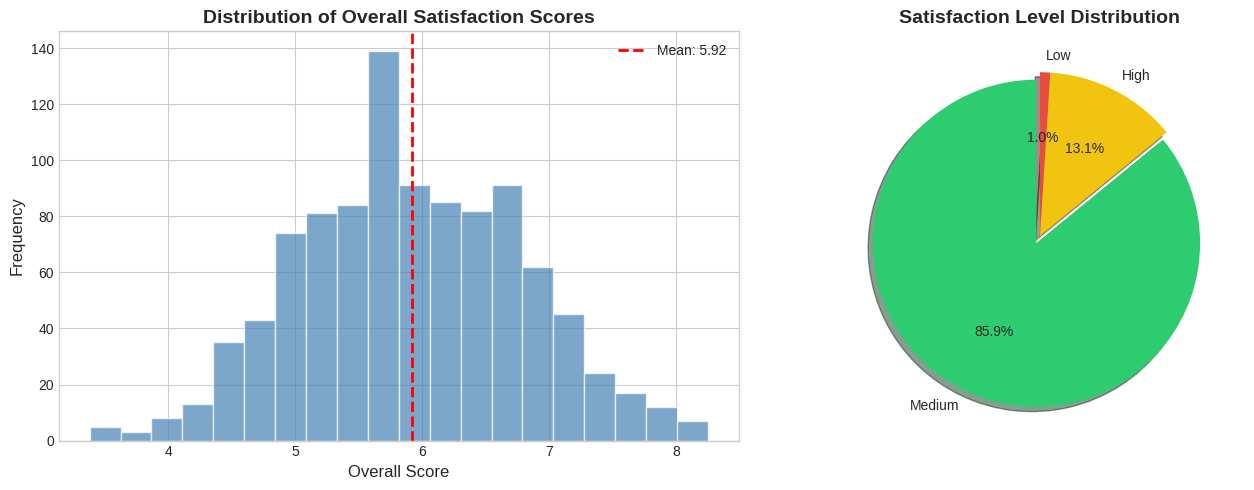


📊 Satisfaction Level Breakdown:
Satisfaction_Level
Medium    860
High      131
Low        10
Name: count, dtype: int64


In [9]:
# Overall Score Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Overall_Score'], bins=20, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].axvline(df['Overall_Score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Overall_Score"].mean():.2f}')
axes[0].set_xlabel('Overall Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Overall Satisfaction Scores', fontsize=14, fontweight='bold')
axes[0].legend()

# Pie chart for satisfaction levels
satisfaction_counts = df['Satisfaction_Level'].value_counts()
colors = ['#2ecc71', '#f1c40f', '#e74c3c']
axes[1].pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%',
            colors=colors, explode=[0.05, 0, 0], shadow=True, startangle=90)
axes[1].set_title('Satisfaction Level Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Satisfaction Level Breakdown:")
print(satisfaction_counts)

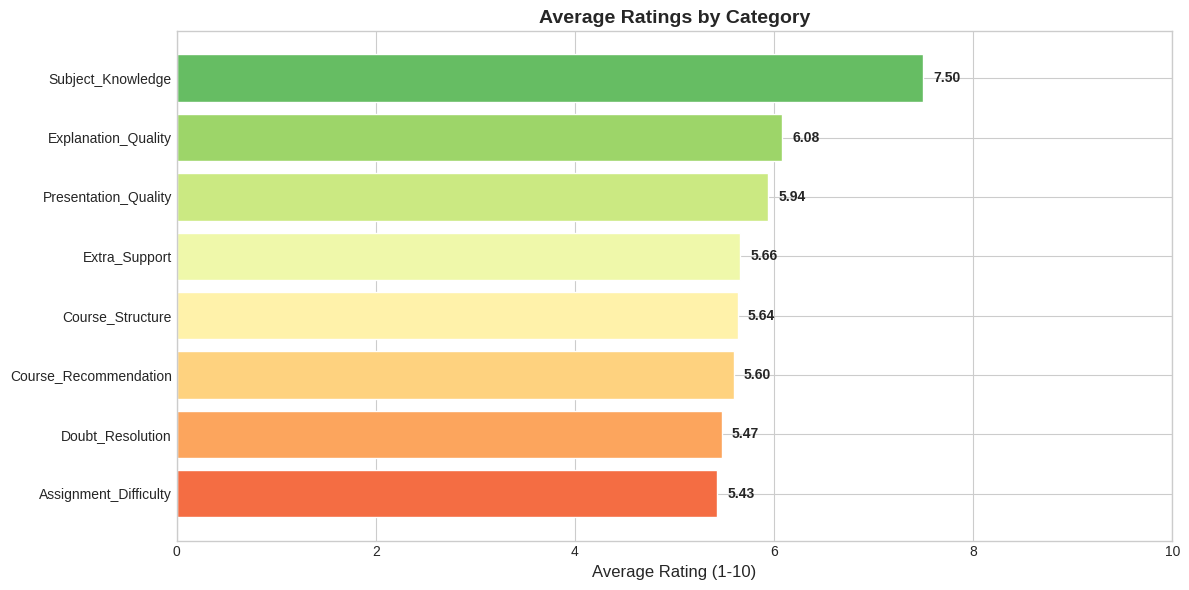

In [10]:
# Average ratings by category
rating_cols = ['Subject_Knowledge', 'Explanation_Quality', 'Presentation_Quality',
               'Assignment_Difficulty', 'Doubt_Resolution', 'Course_Structure',
               'Extra_Support', 'Course_Recommendation']

avg_ratings = df[rating_cols].mean().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(avg_ratings)))
bars = ax.barh(avg_ratings.index, avg_ratings.values, color=colors, edgecolor='white')

# Add value labels
for bar, val in zip(bars, avg_ratings.values):
    ax.text(val + 0.1, bar.get_y() + bar.get_height()/2, f'{val:.2f}',
            va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Average Rating (1-10)', fontsize=12)
ax.set_title('Average Ratings by Category', fontsize=14, fontweight='bold')
ax.set_xlim(0, 10)
plt.tight_layout()
plt.show()

In [11]:
# Interactive Rating Comparison by Event Type
event_ratings = df.groupby('Event_Type')[rating_cols].mean()

fig = px.bar(event_ratings.reset_index().melt(id_vars='Event_Type'),
             x='Event_Type', y='value', color='variable',
             barmode='group',
             title='📊 Rating Comparison Across Event Types',
             labels={'value': 'Average Rating', 'variable': 'Category'},
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(xaxis_title='Event Type', yaxis_title='Average Rating',
                  legend_title='Rating Category', height=500)
fig.show()

In [12]:
# Top 3 Events with Highest Satisfaction
event_satisfaction = df.groupby('Event_Type')['Overall_Score'].mean().sort_values(ascending=False)

print("="*60)
print("🏆 TOP 3 EVENTS WITH HIGHEST SATISFACTION")
print("="*60)

for i, (event, score) in enumerate(event_satisfaction.head(3).items(), 1):
    medal = ["🥇", "🥈", "🥉"][i-1]
    print(f"{medal} {i}. {event}: {score:.2f}/10")

# Visualize
fig = px.bar(x=event_satisfaction.index, y=event_satisfaction.values,
             title='🏆 Event Types Ranked by Satisfaction',
             labels={'x': 'Event Type', 'y': 'Average Satisfaction Score'},
             color=event_satisfaction.values,
             color_continuous_scale='RdYlGn')
fig.update_layout(showlegend=False)
fig.show()

🏆 TOP 3 EVENTS WITH HIGHEST SATISFACTION
🥇 1. Tech Talk: 6.00/10
🥈 2. Seminar: 5.95/10
🥉 3. Workshop: 5.94/10


In [13]:
# Department Analysis - Which departments hosted the most-liked events?
dept_satisfaction = df.groupby('Department').agg({
    'Overall_Score': ['mean', 'count'],
    'Student ID': 'nunique'
}).round(2)

dept_satisfaction.columns = ['Avg_Score', 'Total_Responses', 'Unique_Students']
dept_satisfaction = dept_satisfaction.sort_values('Avg_Score', ascending=False)

print("="*60)
print("🏛️ DEPARTMENT-WISE SATISFACTION ANALYSIS")
print("="*60)
print(dept_satisfaction)

# Visualization
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Average Score by Department', 'Response Count by Department'),
                    specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(
    go.Bar(x=dept_satisfaction.index, y=dept_satisfaction['Avg_Score'],
           marker_color=px.colors.qualitative.Pastel),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=dept_satisfaction.index, values=dept_satisfaction['Total_Responses'],
           hole=0.4),
    row=1, col=2
)

fig.update_layout(title_text='🏛️ Department Performance Dashboard', height=450, showlegend=False)
fig.show()

🏛️ DEPARTMENT-WISE SATISFACTION ANALYSIS
                  Avg_Score  Total_Responses  Unique_Students
Department                                                   
Management             5.98              170              170
Arts                   5.92              162              162
Mechanical             5.92              163              163
Computer Science       5.92              172              172
Civil                  5.89              158              158
Electronics            5.86              176              176


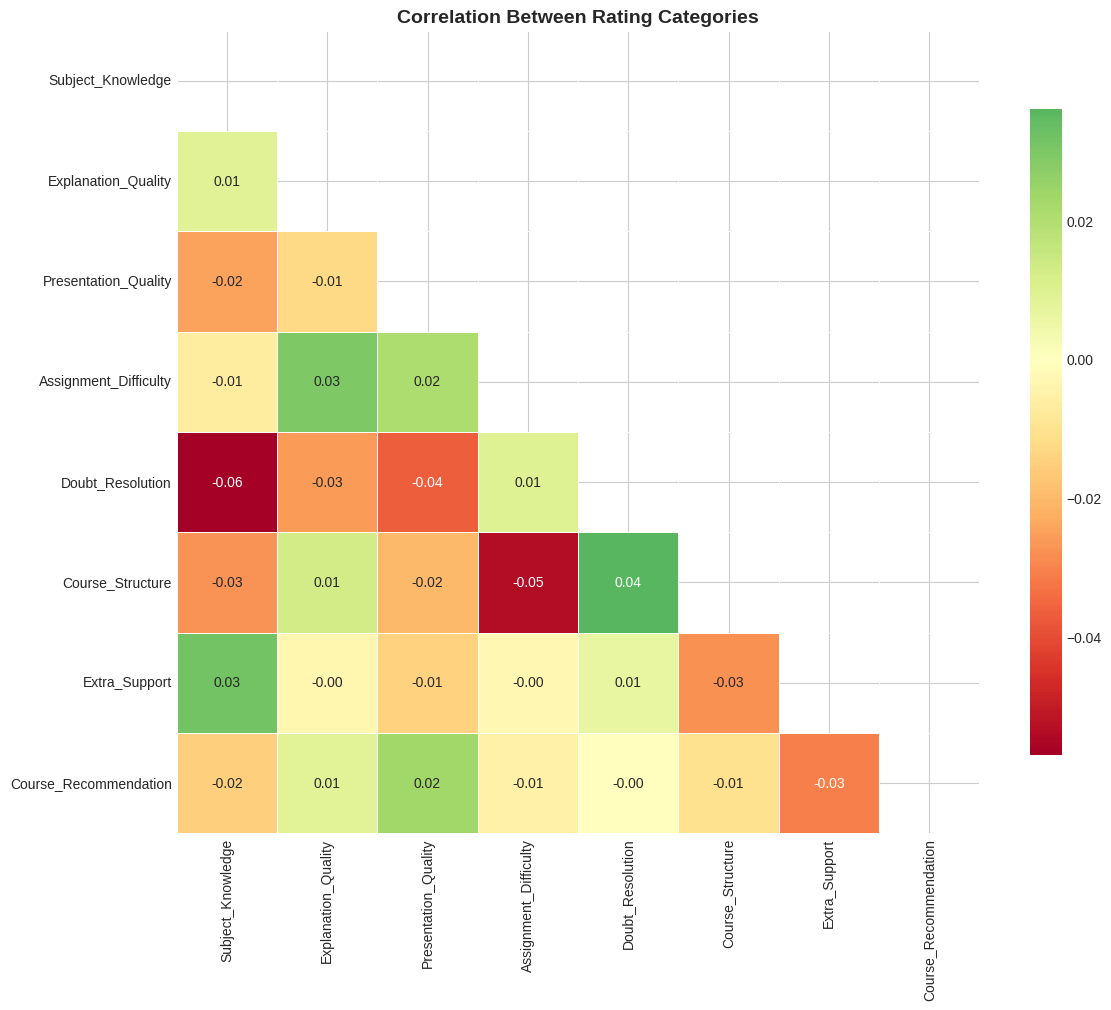


📈 Key Correlations:
                                        Pair  Correlation
         Doubt_Resolution ↔ Course_Structure     0.036062
           Subject_Knowledge ↔ Extra_Support     0.031488
 Explanation_Quality ↔ Assignment_Difficulty     0.029484
Presentation_Quality ↔ Course_Recommendation     0.023173
Presentation_Quality ↔ Assignment_Difficulty     0.020918


In [14]:
# Correlation Heatmap between different rating categories
correlation_matrix = df[rating_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdYlGn', center=0, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Between Rating Categories', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📈 Key Correlations:")
# Find top correlations
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Pair': f"{correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}",
            'Correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)
print(corr_df.head(5).to_string(index=False))

In [15]:
# Correlation between Ratings and Event Type (Workshop vs Seminar focus)
workshop_seminar = df[df['Event_Type'].isin(['Workshop', 'Seminar'])]

fig = px.box(workshop_seminar, x='Event_Type', y='Overall_Score',
             color='Event_Type',
             title='📊 Workshop vs Seminar: Rating Distribution Comparison',
             color_discrete_map={'Workshop': '#3498db', 'Seminar': '#e74c3c'})

fig.update_layout(showlegend=False, height=450)
fig.show()

# Statistical comparison
print("\n📈 Workshop vs Seminar Statistics:")
comparison = workshop_seminar.groupby('Event_Type')['Overall_Score'].agg(['mean', 'std', 'min', 'max', 'count'])
comparison.columns = ['Mean Score', 'Std Dev', 'Min', 'Max', 'Count']
print(comparison.round(2))


📈 Workshop vs Seminar Statistics:
            Mean Score  Std Dev   Min   Max  Count
Event_Type                                        
Seminar           5.95     0.87  3.88  8.12    190
Workshop          5.94     0.89  3.75  8.25    210


## 6. Sentiment Analysis using NLP

Now let's analyze the text feedback using Natural Language Processing techniques.

In [16]:
# Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    """Analyze sentiment of text using TextBlob.
    Returns polarity (-1 to 1) and subjectivity (0 to 1)"""
    blob = TextBlob(str(text))
    return blob.sentiment.polarity, blob.sentiment.subjectivity

def categorize_sentiment(polarity):
    """Categorize sentiment based on polarity score."""
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Polarity'], df['Subjectivity'] = zip(*df['Feedback_Comment'].apply(analyze_sentiment))
df['Sentiment'] = df['Polarity'].apply(categorize_sentiment)

print("✅ Sentiment analysis completed!")
print("\n📊 Sentiment Distribution:")
print(df['Sentiment'].value_counts())

# Display sample results
df[['Feedback_Comment', 'Polarity', 'Subjectivity', 'Sentiment']].head(10)

✅ Sentiment analysis completed!

📊 Sentiment Distribution:
Sentiment
Positive    820
Negative     91
Neutral      90
Name: count, dtype: int64


,Feedback_Comment,Polarity,Subjectivity,Sentiment
0,It was an alright session. Nothing extraordinary.,0.333333,1.000000,Positive
1,The event was okay. Some parts were interesting.,0.500000,0.500000,Positive
2,The event was okay. Some parts were interesting.,0.500000,0.500000,Positive
3,The content was decent but the pace was too fast.,0.183333,0.633333,Positive
4,Fantastic session! The instructor explained co...,0.300000,0.641667,Positive
5,Some useful information but could be improved.,0.300000,0.000000,Positive
6,Okay event. The time management could be better.,0.500000,0.500000,Positive
7,Decent workshop but the materials were outdated.,-0.116667,0.650000,Negative
8,Average experience. Could have been more inter...,0.175000,0.450000,Positive
9,Average experience. Could have been more inter...,0.175000,0.450000,Positive


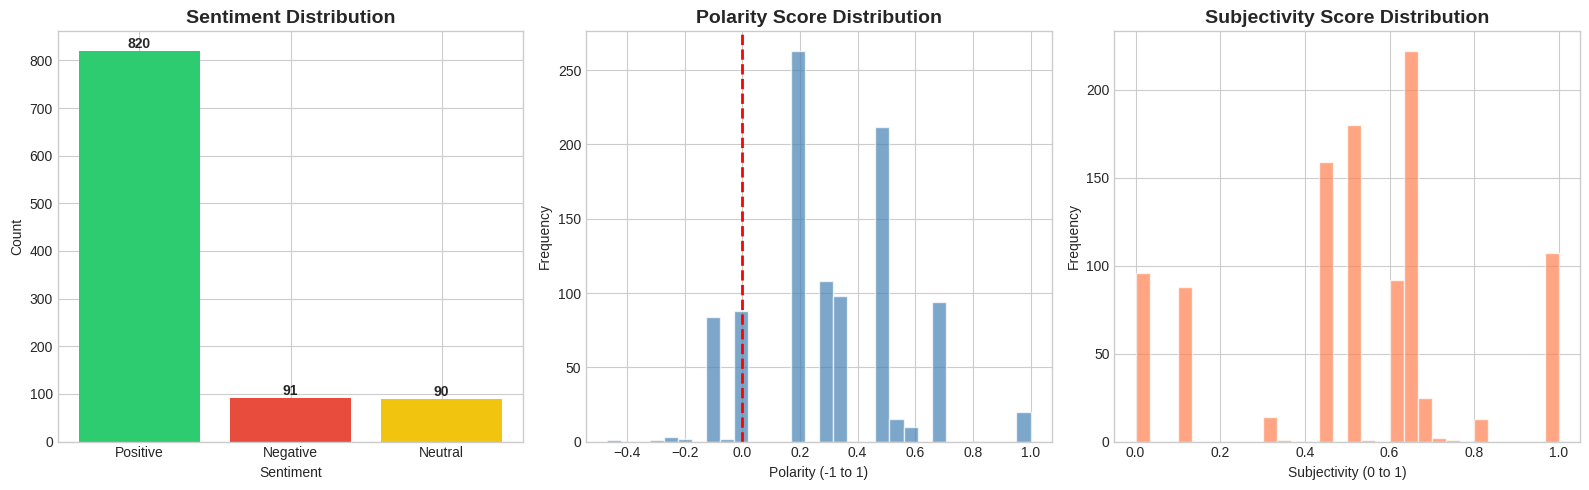

In [17]:
# Sentiment Distribution Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Sentiment Count
sentiment_counts = df['Sentiment'].value_counts()
colors = {'Positive': '#2ecc71', 'Neutral': '#f1c40f', 'Negative': '#e74c3c'}
bars = axes[0].bar(sentiment_counts.index, sentiment_counts.values,
                   color=[colors[s] for s in sentiment_counts.index])
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Add count labels
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Polarity Distribution
axes[1].hist(df['Polarity'], bins=30, color='steelblue', edgecolor='white', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Polarity Score Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Polarity (-1 to 1)')
axes[1].set_ylabel('Frequency')

# Subjectivity Distribution
axes[2].hist(df['Subjectivity'], bins=30, color='coral', edgecolor='white', alpha=0.7)
axes[2].set_title('Subjectivity Score Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Subjectivity (0 to 1)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
# Sentiment by Event Type
sentiment_by_event = pd.crosstab(df['Event_Type'], df['Sentiment'], normalize='index') * 100

fig = px.bar(sentiment_by_event.reset_index().melt(id_vars='Event_Type'),
             x='Event_Type', y='value', color='Sentiment',
             title='📊 Sentiment Distribution by Event Type',
             labels={'value': 'Percentage (%)', 'Sentiment': 'Sentiment'},
             color_discrete_map=colors,
             barmode='stack')

fig.update_layout(xaxis_title='Event Type', yaxis_title='Percentage (%)', height=450)
fig.show()

In [19]:
# Sentiment vs Overall Score Scatter Plot
fig = px.scatter(df, x='Overall_Score', y='Polarity',
                 color='Sentiment', size='Subjectivity',
                 hover_data=['Event_Type', 'Department', 'Feedback_Comment'],
                 title='📈 Relationship between Rating Score and Sentiment',
                 color_discrete_map=colors)

fig.update_layout(xaxis_title='Overall Rating Score',
                  yaxis_title='Sentiment Polarity',
                  height=500)
fig.show()

## 7. Word Cloud Analysis

Let's create word clouds to visualize the most common words in feedback comments.

In [20]:
# Text preprocessing function
def preprocess_text(text):
    """Clean and preprocess text for word cloud."""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Combine all comments
all_comments = ' '.join(df['Feedback_Comment'].apply(preprocess_text))
positive_comments = ' '.join(df[df['Sentiment'] == 'Positive']['Feedback_Comment'].apply(preprocess_text))
negative_comments = ' '.join(df[df['Sentiment'] == 'Negative']['Feedback_Comment'].apply(preprocess_text))

# Custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['the', 'was', 'were', 'is', 'are', 'and', 'or', 'but', 'very', 'too'])

print("✅ Text preprocessing completed!")

✅ Text preprocessing completed!


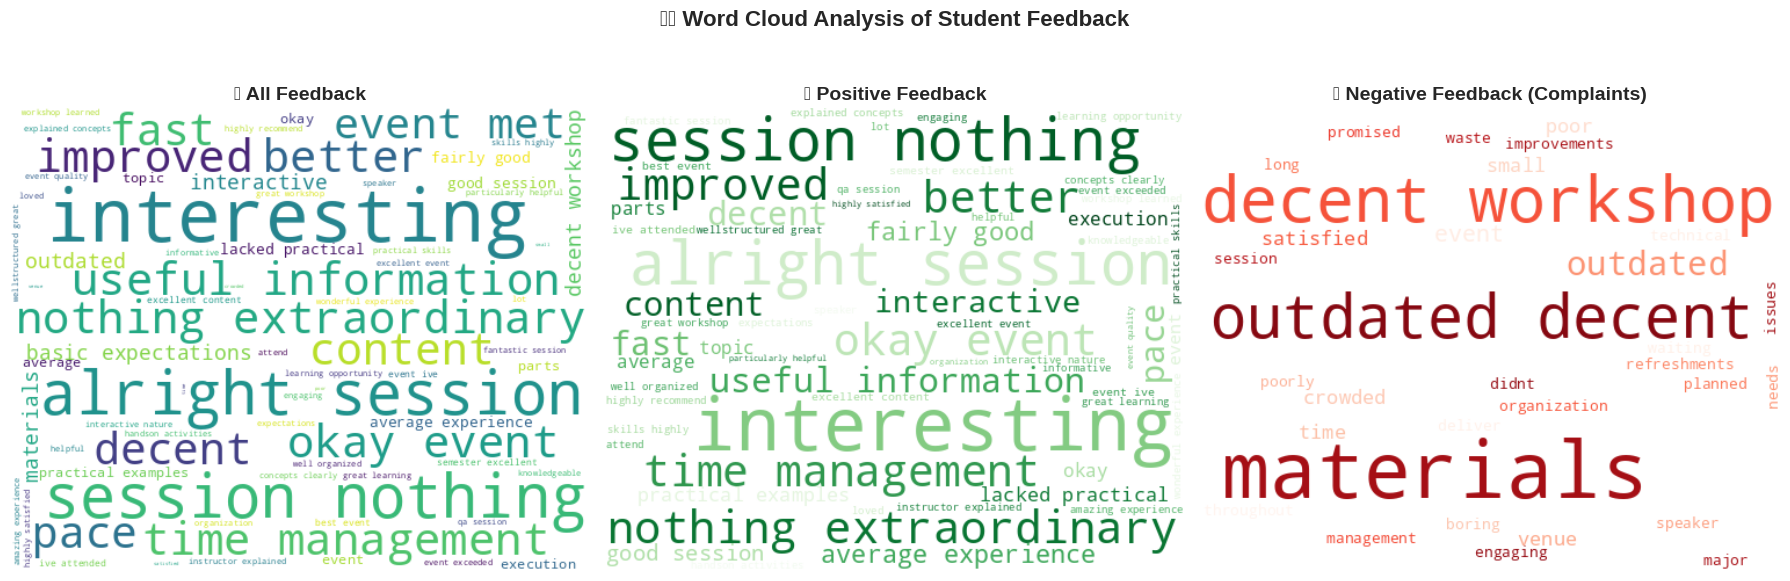

In [21]:
# Create Word Clouds
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# All comments word cloud
wc_all = WordCloud(width=500, height=400, background_color='white',
                   stopwords=custom_stopwords, colormap='viridis',
                   max_words=100).generate(all_comments)
axes[0].imshow(wc_all, interpolation='bilinear')
axes[0].set_title('🌐 All Feedback', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Positive comments word cloud
wc_positive = WordCloud(width=500, height=400, background_color='white',
                        stopwords=custom_stopwords, colormap='Greens',
                        max_words=100).generate(positive_comments)
axes[1].imshow(wc_positive, interpolation='bilinear')
axes[1].set_title('😊 Positive Feedback', fontsize=14, fontweight='bold')
axes[1].axis('off')

# Negative comments word cloud
wc_negative = WordCloud(width=500, height=400, background_color='white',
                        stopwords=custom_stopwords, colormap='Reds',
                        max_words=100).generate(negative_comments)
axes[2].imshow(wc_negative, interpolation='bilinear')
axes[2].set_title('😞 Negative Feedback (Complaints)', fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.suptitle('☁️ Word Cloud Analysis of Student Feedback', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [22]:
# Most Common Words Analysis
stop_words = set(stopwords.words('english'))

def get_common_words(text, n=15):
    """Extract n most common words from text."""
    words = word_tokenize(text.lower())
    words = [w for w in words if w.isalpha() and w not in stop_words and len(w) > 2]
    return Counter(words).most_common(n)

# Get common words for negative comments (complaints)
common_negative = get_common_words(negative_comments, 10)

print("="*60)
print("🔍 MOST COMMON WORDS IN COMPLAINTS")
print("="*60)
for i, (word, count) in enumerate(common_negative, 1):
    print(f"{i}. '{word}': {count} occurrences")

# Visualize
words, counts = zip(*common_negative)
fig = px.bar(x=list(counts), y=list(words), orientation='h',
             title='📊 Most Common Words in Negative Feedback (Complaints)',
             labels={'x': 'Frequency', 'y': 'Words'},
             color=list(counts), color_continuous_scale='Reds')
fig.update_layout(showlegend=False, height=400)
fig.show()

🔍 MOST COMMON WORDS IN COMPLAINTS
1. 'decent': 84 occurrences
2. 'workshop': 84 occurrences
3. 'materials': 84 occurrences
4. 'outdated': 84 occurrences
5. 'event': 3 occurrences
6. 'poor': 2 occurrences
7. 'satisfied': 2 occurrences
8. 'venue': 2 occurrences
9. 'small': 2 occurrences
10. 'crowded': 2 occurrences


## 8. Comprehensive Dashboard

Let's create a comprehensive dashboard summarizing all our findings.

In [23]:
# Create a comprehensive dashboard
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=(
        'Overall Score Distribution',
        'Satisfaction Levels',
        'Sentiment Distribution',
        'Avg Score by Event Type',
        'Avg Score by Department',
        'Polarity vs Rating'
    ),
    specs=[
        [{"type": "histogram"}, {"type": "pie"}, {"type": "pie"}],
        [{"type": "bar"}, {"type": "bar"}, {"type": "scatter"}]
    ]
)

# 1. Overall Score Distribution
fig.add_trace(
    go.Histogram(x=df['Overall_Score'], nbinsx=20, marker_color='steelblue', name='Score'),
    row=1, col=1
)

# 2. Satisfaction Levels Pie
sat_counts = df['Satisfaction_Level'].value_counts()
fig.add_trace(
    go.Pie(labels=sat_counts.index, values=sat_counts.values,
           marker_colors=['#2ecc71', '#f1c40f', '#e74c3c'], hole=0.3),
    row=1, col=2
)

# 3. Sentiment Pie
sent_counts = df['Sentiment'].value_counts()
fig.add_trace(
    go.Pie(labels=sent_counts.index, values=sent_counts.values,
           marker_colors=['#2ecc71', '#f1c40f', '#e74c3c'], hole=0.3),
    row=1, col=3
)

# 4. Avg Score by Event Type
event_avg = df.groupby('Event_Type')['Overall_Score'].mean().sort_values(ascending=True)
fig.add_trace(
    go.Bar(x=event_avg.values, y=event_avg.index, orientation='h',
           marker_color='coral'),
    row=2, col=1
)

# 5. Avg Score by Department
dept_avg = df.groupby('Department')['Overall_Score'].mean().sort_values(ascending=True)
fig.add_trace(
    go.Bar(x=dept_avg.values, y=dept_avg.index, orientation='h',
           marker_color='teal'),
    row=2, col=2
)

# 6. Polarity vs Rating Scatter
fig.add_trace(
    go.Scatter(x=df['Overall_Score'], y=df['Polarity'], mode='markers',
               marker=dict(color=df['Polarity'], colorscale='RdYlGn', size=8, opacity=0.6)),
    row=2, col=3
)

fig.update_layout(
    title_text='📊 Student Feedback Analysis Dashboard',
    height=700,
    showlegend=False,
    title_font_size=20
)

fig.show()

## 9. Key Findings & Recommendations

Based on our comprehensive analysis, here are the key findings and recommendations for event organizers.

In [24]:
# Generate Summary Statistics
print("="*70)
print("📋 EXECUTIVE SUMMARY: STUDENT FEEDBACK ANALYSIS")
print("="*70)

# Overall Statistics
print("\n📊 OVERALL STATISTICS")
print("-"*40)
print(f"  • Total Responses: {len(df)}")
print(f"  • Average Satisfaction Score: {df['Overall_Score'].mean():.2f}/10")
print(f"  • Standard Deviation: {df['Overall_Score'].std():.2f}")
print(f"  • Highest Score: {df['Overall_Score'].max():.2f}")
print(f"  • Lowest Score: {df['Overall_Score'].min():.2f}")

# Satisfaction Breakdown
print("\n😊 SATISFACTION BREAKDOWN")
print("-"*40)
sat_pct = df['Satisfaction_Level'].value_counts(normalize=True) * 100
for level, pct in sat_pct.items():
    emoji = {'High': '😄', 'Medium': '😐', 'Low': '😞'}[level]
    print(f"  {emoji} {level}: {pct:.1f}%")

# Top Events
print("\n🏆 TOP 3 BEST PERFORMING EVENTS")
print("-"*40)
for i, (event, score) in enumerate(event_satisfaction.head(3).items(), 1):
    print(f"  {i}. {event}: {score:.2f}/10")

# Best Departments
print("\n🏛️ TOP 3 BEST PERFORMING DEPARTMENTS")
print("-"*40)
for i, (dept, score) in enumerate(dept_avg.sort_values(ascending=False).head(3).items(), 1):
    print(f"  {i}. {dept}: {score:.2f}/10")

# Sentiment Summary
print("\n💭 SENTIMENT ANALYSIS SUMMARY")
print("-"*40)
sent_pct = df['Sentiment'].value_counts(normalize=True) * 100
for sent, pct in sent_pct.items():
    emoji = {'Positive': '😊', 'Neutral': '😐', 'Negative': '😞'}[sent]
    print(f"  {emoji} {sent}: {pct:.1f}%")
print(f"  • Average Polarity: {df['Polarity'].mean():.3f}")
print(f"  • Average Subjectivity: {df['Subjectivity'].mean():.3f}")

📋 EXECUTIVE SUMMARY: STUDENT FEEDBACK ANALYSIS

📊 OVERALL STATISTICS
----------------------------------------
  • Total Responses: 1001
  • Average Satisfaction Score: 5.92/10
  • Standard Deviation: 0.89
  • Highest Score: 8.25
  • Lowest Score: 3.38

😊 SATISFACTION BREAKDOWN
----------------------------------------
  😐 Medium: 85.9%
  😄 High: 13.1%
  😞 Low: 1.0%

🏆 TOP 3 BEST PERFORMING EVENTS
----------------------------------------
  1. Tech Talk: 6.00/10
  2. Seminar: 5.95/10
  3. Workshop: 5.94/10

🏛️ TOP 3 BEST PERFORMING DEPARTMENTS
----------------------------------------
  1. Management: 5.98/10
  2. Computer Science: 5.92/10
  3. Mechanical: 5.92/10

💭 SENTIMENT ANALYSIS SUMMARY
----------------------------------------
  😊 Positive: 81.9%
  😞 Negative: 9.1%
  😐 Neutral: 9.0%
  • Average Polarity: 0.305
  • Average Subjectivity: 0.511


In [25]:
# Key Recommendations
print("\n" + "="*70)
print("💡 KEY RECOMMENDATIONS FOR EVENT ORGANIZERS")
print("="*70)

recommendations = [
    {
        "title": "Focus on Low-Scoring Categories",
        "detail": f"'{avg_ratings.index[0]}' has the lowest average rating ({avg_ratings.values[0]:.2f}). Consider improving this aspect."
    },
    {
        "title": "Replicate Success from Top Events",
        "detail": f"{event_satisfaction.index[0]} events have the highest satisfaction. Study and apply their best practices."
    },
    {
        "title": "Address Common Complaints",
        "detail": f"Common issues mentioned: {', '.join([w[0] for w in common_negative[:5]])}. Address these concerns."
    },
    {
        "title": "Learn from Top Departments",
        "detail": f"{dept_avg.sort_values(ascending=False).index[0]} hosts the best-rated events. Share their strategies."
    },
    {
        "title": "Improve Negative Sentiment Areas",
        "detail": f"{sent_pct.get('Negative', 0):.1f}% of feedback is negative. Implement feedback loops to address issues promptly."
    }
]

for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. 🎯 {rec['title']}")
    print(f"   ➤ {rec['detail']}")

print("\n" + "="*70)
print("📈 ACTIONABLE NEXT STEPS")
print("="*70)

next_steps = [
    "Conduct follow-up surveys focusing on identified pain points",
    "Organize training sessions for event organizers based on top-performing practices",
    "Implement real-time feedback collection during events",
    "Create a recognition program for high-performing departments",
    "Establish regular review meetings to discuss feedback trends"
]

for i, step in enumerate(next_steps, 1):
    print(f"  {i}. {step}")


💡 KEY RECOMMENDATIONS FOR EVENT ORGANIZERS

1. 🎯 Focus on Low-Scoring Categories
   ➤ 'Assignment_Difficulty' has the lowest average rating (5.43). Consider improving this aspect.

2. 🎯 Replicate Success from Top Events
   ➤ Tech Talk events have the highest satisfaction. Study and apply their best practices.

3. 🎯 Address Common Complaints
   ➤ Common issues mentioned: decent, workshop, materials, outdated, event. Address these concerns.

4. 🎯 Learn from Top Departments
   ➤ Management hosts the best-rated events. Share their strategies.

5. 🎯 Improve Negative Sentiment Areas
   ➤ 9.1% of feedback is negative. Implement feedback loops to address issues promptly.

📈 ACTIONABLE NEXT STEPS
  1. Conduct follow-up surveys focusing on identified pain points
  2. Organize training sessions for event organizers based on top-performing practices
  3. Implement real-time feedback collection during events
  4. Create a recognition program for high-performing departments
  5. Establish regular r

In [26]:
# Save the enriched dataset
output_filename = 'enriched_student_feedback.csv'
df.to_csv(output_filename, index=False)

print(f"\n✅ Enriched dataset saved as '{output_filename}'")
print(f"   Columns added: Event_Type, Department, Overall_Score, Satisfaction_Level,")
print(f"                  Feedback_Comment, Polarity, Subjectivity, Sentiment")

# Download the file in Colab
from google.colab import files
files.download(output_filename)
print(f"\n📥 Download started for '{output_filename}'")


✅ Enriched dataset saved as 'enriched_student_feedback.csv'
   Columns added: Event_Type, Department, Overall_Score, Satisfaction_Level,
                  Feedback_Comment, Polarity, Subjectivity, Sentiment


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📥 Download started for 'enriched_student_feedback.csv'


---

## 📝 Summary

This analysis provided comprehensive insights into student feedback for campus events:

### Key Findings:
1. **Rating Patterns**: Identified which aspects of events receive highest/lowest ratings
2. **Top Events**: Determined which event types generate the most satisfaction
3. **Department Performance**: Analyzed which departments host the most successful events
4. **Sentiment Insights**: Used NLP to categorize feedback as positive, neutral, or negative
5. **Common Complaints**: Word cloud analysis revealed frequent issues in negative feedback

### Tools & Techniques Used:
- **Pandas**: Data cleaning and manipulation
- **Matplotlib & Seaborn**: Static visualizations
- **Plotly**: Interactive charts and dashboards
- **TextBlob & NLTK**: Natural Language Processing
- **WordCloud**: Visual text analysis

### Deliverables:
- ✅ Clean, analyzed dataset
- ✅ Interactive visualizations
- ✅ Sentiment analysis summary
- ✅ Actionable recommendations

---

**Created for: Future Intern Internship - Task 3**

**Date: 2026**